In [17]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential  
from tensorflow.python.keras.layers import Dense

import tempfile
from matplotlib import pyplot as plt

# start cari files/images dalam folder ( scan dalam folder ada berapa files untuk train)
#satu part untuk training, satu part untuk validation

batch_size = 50
img_height = 300
img_width = 300
data_dir="C:/Users/ADMIN/Documents/CSC583/Python AI/Mushroom/Test"


train_ds= tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 2878 files belonging to 7 classes.
Using 2303 files for training.
Found 2878 files belonging to 7 classes.
Using 575 files for validation.


In [18]:
#print ada berapa class untuk di train

class_names = train_ds.class_names
print(class_names)

['Amanita bisporigera', 'Amanita muscaria', 'Boletus edulis', 'Cantharellus', 'Enoki mushroom', 'Russula mariae', 'saved_model']


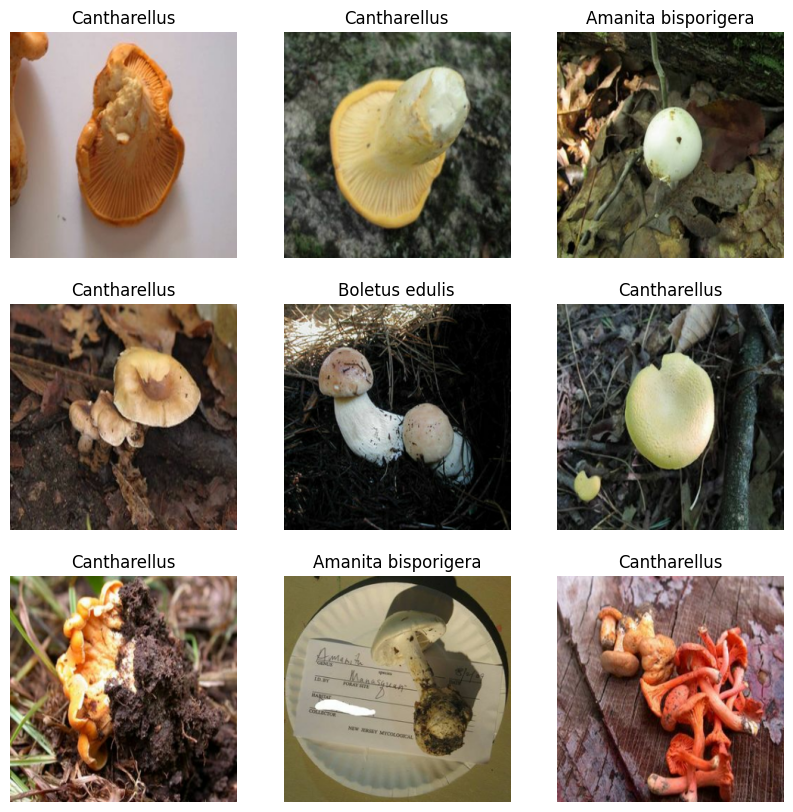

In [19]:
import matplotlib.pyplot as plt

#print images untuk training

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [20]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(50, 300, 300, 3)
(50,)


In [21]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(50, 300, 300, 3)
(50,)


In [22]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(50, 300, 300, 3)
(50,)


In [23]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0015687232 0.9968498


In [24]:
num_classes = 6

model = Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(7)
])

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
#train Epoch 1
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 150, 150, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)       

In [27]:
# train Epoch 2
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 150, 150, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)       

In [28]:
epochs=25
model.fit(train_ds,validation_data=val_ds,epochs=epochs)
tf.debugging.disable_traceback_filtering()

#Save the entire model as a SavedModel.

!mkdir -p saved_model
model.save('C:/Users/Hanis Syahidah/Documents/CSC583/Python AI/Mushroom/saved_model/my_model')

Epoch 1/25
47/47 [==============================] - 162s 3s/step - loss: 1.6314 - accuracy: 0.4750 - val_loss: 1.2692 - val_accuracy: 0.5409
Epoch 2/25
47/47 [==============================] - 151s 3s/step - loss: 1.1082 - accuracy: 0.5983 - val_loss: 1.0904 - val_accuracy: 0.5948
Epoch 3/25
47/47 [==============================] - 150s 3s/step - loss: 0.8760 - accuracy: 0.6917 - val_loss: 1.0273 - val_accuracy: 0.6226
Epoch 4/25
47/47 [==============================] - 152s 3s/step - loss: 0.7022 - accuracy: 0.7577 - val_loss: 1.2010 - val_accuracy: 0.5617
Epoch 5/25
47/47 [==============================] - 147s 3s/step - loss: 0.4216 - accuracy: 0.8619 - val_loss: 1.1240 - val_accuracy: 0.6365
Epoch 6/25
47/47 [==============================] - 147s 3s/step - loss: 0.2650 - accuracy: 0.9149 - val_loss: 1.4898 - val_accuracy: 0.6174
Epoch 7/25
47/47 [==============================] - 145s 3s/step - loss: 0.1394 - accuracy: 0.9574 - val_loss: 1.7227 - val_accuracy: 0.6278
Epoch 8/25
47

INFO:tensorflow:Assets written to: C:/Users/Hanis Syahidah/Documents/CSC583/Python AI/Mushroom/saved_model/my_model\assets


INFO:tensorflow:Assets written to: C:/Users/Hanis Syahidah/Documents/CSC583/Python AI/Mushroom/saved_model/my_model\assets


In [29]:
new_model = tf.keras.models.load_model('C:/Users/Hanis Syahidah/Documents/CSC583/Python AI/Mushroom/saved_model/my_model')
# new_model = tf.keras.models.load_model('./SavedModel')

# Check its architecture
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 150, 150, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)       

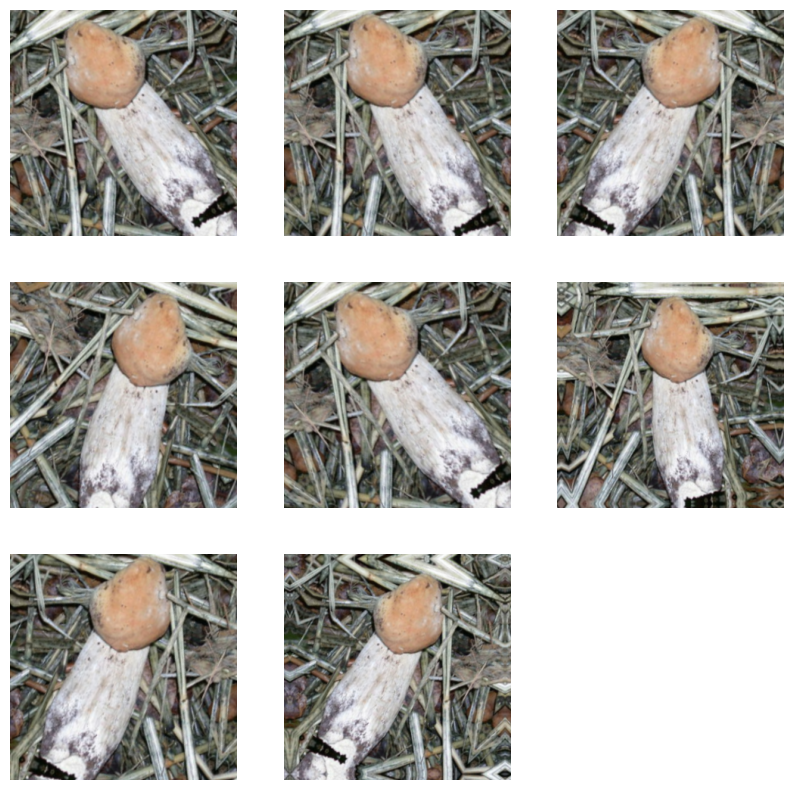

In [30]:
data_augmentation = keras.Sequential(
    [
        keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height,img_width,3)),
     keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
    ]
)

plt.figure(figsize=(10,10))
for images, _ in train_ds.take(1):
  for i in range(8):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3,3, i+1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [31]:
model = Sequential([
  data_augmentation,
  keras.layers.experimental.preprocessing.Rescaling(1./255), 
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)

  ])

model.compile(optimizer='adam'),
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy']
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 300, 300, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 150, 150, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                 

In [32]:
#sini untuk test image

img = keras.preprocessing.image.load_img(
    "C:/Users/Hanis Syahidah/Downloads/14666.jpg", target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = new_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)],100*np.max(score))
)

1/1 [==============================] - 0s 253ms/step
This image most likely belongs to Amanita bisporigera with a 99.69 percent confidence.
